In [1]:
import numpy as np
import pandas as pd
import vaex
import seaborn as sns

In [2]:
## Tabular Data
data_dir = "/home/nikhil/projects/brain_changes/data/adni/"

tab_csv = f"{data_dir}/tabular/ADNI123_long_aug_2021.csv"


## Image and subject ID dataframe

In [38]:
tab_data = pd.read_csv(tab_csv)
tab_data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I673862,941_S_5193,SMC,F,74,30,MRI,MPRAGE,Original,4/02/2015,DCM,NaN
1,I673841,941_S_5124,SMC,F,79,30,MRI,MPRAGE,Original,4/08/2015,DCM,NaN
2,I420755,941_S_5124,SMC,F,78,28,MRI,MPRAGE,Original,4/21/2014,DCM,NaN
3,I431036,941_S_4764,EMCI,F,85,30,MRI,MPRAGE,Original,6/16/2014,DCM,NaN
4,I376064,941_S_4764,EMCI,F,84,28,MRI,MPRAGE,Original,6/10/2013,DCM,NaN


## Count follow-up subjects

In [42]:
# Remove duplicate scans based on subject_id and Acq data
tab_data = tab_data.drop_duplicates(subset=["Subject","Acq Date"],keep="last")

subject_ids = tab_data["Subject"].unique()
print(f"n_subjects: {len(subject_ids)}")

scan_count_df = pd.DataFrame(tab_data["Subject"].value_counts())
scan_count_df.columns = ["n_scans"]

subject_ids_follow_up = scan_count_df[scan_count_df["n_scans"]>1]
n_follow_up_scans = len(subject_ids_follow_up)
print(f"number os subject with follow-up scans: {n_follow_up_scans}")


n_subjects: 1057
number os subject with follow-up scans: 878


## Plot scan distributions

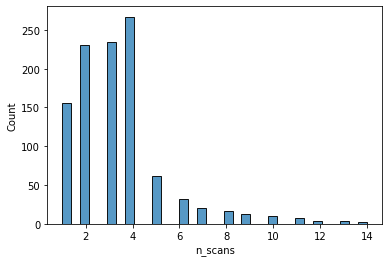

In [43]:
sns.histplot(scan_counts["n_scans"])

## Age distribution

In [54]:
# Remove duplicate images based on identical subject ID and age
follow_up_data = tab_data[tab_data["Subject"].isin(subject_ids_follow_up.index)]
follow_up_data = follow_up_data.sort_values(["Subject","Age","Image Data ID"])

age_data_first_df = follow_up_data.drop_duplicates(subset=['Subject'],keep="first")
age_data_last_df = follow_up_data.drop_duplicates(subset=['Subject'],keep="last")
scan_max_age_diff = age_data_last_df["Age"].values - age_data_first_df["Age"].values
age_data_df = age_data_first_df.copy()
age_data_df["max_age_diff"] = scan_max_age_diff
age_data_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,max_age_diff
3570,I30119,002_S_0413,CN,F,77,3,MRI,MPRAGE,Original,11/15/2006,DCM,NaN,8
3561,I32918,002_S_0559,CN,M,80,3,MRI,MPRAGE,Original,12/12/2006,DCM,NaN,2
3556,I71857,002_S_0729,MCI,F,66,4,MRI,MPRAGE,Original,9/05/2007,DCM,NaN,6
3547,I53479,002_S_0954,MCI,F,70,3,MRI,MPRAGE,Original,5/03/2007,DCM,NaN,1
3545,I57072,002_S_1018,AD,F,71,3,MRI,MPRAGE,Original,6/14/2007,DCM,NaN,2


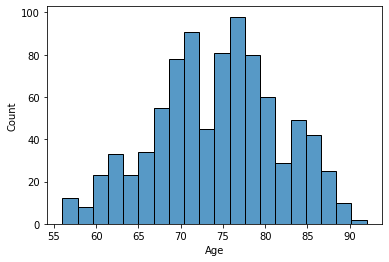

In [47]:
sns.histplot(age_data_df["Age"])

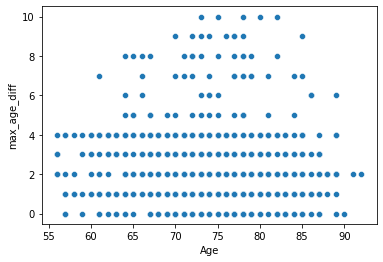

In [56]:
sns.scatterplot(x=age_data_df["Age"],y=age_data_df["max_age_diff"])